In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import linregress

csv = pd.read_csv('joint_data_12_to_16_noformatting.csv')

joint_df = pd.DataFrame(csv)
joint_df = joint_df.sort_values(['State','Year'])
joint_df = joint_df.reset_index(drop=True)
joint_df.dtypes

Year                                  int64
State                                object
Median Income                       float64
Number Employed                       int64
Number Unemployed                     int64
Number Poverty                        int64
Number Families in Poverty            int64
Median Age                          float64
Population                          float64
Pop: White Only                     float64
Pop: Black Only                     float64
Pop: American Indian Only           float64
Pop: Native Hawaiian Only           float64
Pop: Two or More Races              float64
Pop: Hispanic Origin                float64
Median Home Value                   float64
Median Gross Rent                   float64
Commute Time: Public Transit        float64
Commute Time: Solo Auto             float64
Commute Time: Walking               float64
Transit: Solo Auto                  float64
Transit: Public Transit             float64
Transit: Walking                

In [70]:
solo_auto_rate = []
public_transit_rate = []
walking_rate = []

for index, row in joint_df.iterrows():
    solo_rate = row[20]/row[8]
    public_rate = row[21]/row[8]
    walk_rate = row[22]/row[8]
    solo_auto_rate.append(solo_rate)
    public_transit_rate.append(public_rate)
    walking_rate.append(walk_rate)
    
joint_df['Transit Rate: Solo Auto'] = solo_auto_rate
joint_df['Transit Rate: Public Transit'] = public_transit_rate
joint_df['Transit Rate: Walking'] = walking_rate
joint_df

,Year,State,Median Income,Number Employed,Number Unemployed,Number Poverty,Number Families in Poverty,Median Age,Population,Pop: White Only,...,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted (Estimate),Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Transit Rate: Solo Auto,Transit Rate: Public Transit,Transit Rate: Walking
0,2014,Alabama,42830.0,2030482,190233,910175,184841,38.6,4849377.0,3320273.0,...,0.332,0.329,0.315,1191274.0,1180413.0,3588783,3751844,0.355546,0.001707,0.004735
1,2016,Alabama,46257.0,2078325,140963,810231,153533,39.0,4863300.0,3316384.0,...,0.591,0.588,0.563,2134061.0,2123372.0,3609447,3770142,0.363576,0.001302,0.004909
2,2012,Alaska,67712.0,351496,29864,72400,12542,33.8,731449.0,486551.0,...,0.589,0.587,0.553,301694.0,300495.0,511792,543763,0.322573,0.007856,0.036008
3,2014,Alaska,71583.0,352531,29164,80627,12999,33.3,736732.0,483584.0,...,0.548,0.542,0.510,285431.0,282382.0,520562,553473,0.338632,0.006384,0.038997
4,2016,Alaska,76440.0,357098,30964,71566,11031,33.5,741894.0,477895.0,...,0.615,0.610,0.574,321271.0,318608.0,522679,555367,0.337639,0.005905,0.037240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2014,West Virginia,41059.0,748143,55257,327764,61757,41.9,1850326.0,1731464.0,...,0.320,0.312,0.307,462864.0,451498.0,1447652,1472594,0.328383,0.002924,0.011463
130,2014,Wisconsin,52622.0,2916863,163484,738270,133444,39.2,5757564.0,4966282.0,...,0.569,0.566,0.539,2422248.0,2410314.0,4260427,4470265,0.403117,0.009460,0.016065
131,2012,Wyoming,54901.0,288852,17113,71019,12425,36.9,576412.0,523798.0,...,0.590,0.586,0.564,250701.0,249061.0,425142,441726,0.375764,0.007597,0.016100
132,2014,Wyoming,57055.0,299225,13477,63774,10979,36.6,584153.0,531680.0,...,0.397,0.390,0.373,171153.0,168390.0,431434,451484,0.389432,0.008188,0.018091


In [72]:
transit_turnout_2012 = joint_df.loc[joint_df['Year'] == 2012, ['State','VEP Total Ballots Counted','Transit Rate: Solo Auto','Transit Rate: Public Transit','Transit Rate: Walking']]
transit_turnout_2012 = transit_turnout_2012.rename(columns={'VEP Total Ballots Counted':'2012 VEP Total Ballots Counted','Transit Rate: Solo Auto':'2012 Transit Rate: Solo Auto','Transit Rate: Public Transit':'2012 Transit Rate: Public Transit','Transit Rate: Walking':'2012 Transit Rate: Walking'})
transit_turnout_2014 = joint_df.loc[joint_df['Year'] == 2014, ['State','VEP Total Ballots Counted','Transit Rate: Solo Auto','Transit Rate: Public Transit','Transit Rate: Walking']]
transit_turnout_2014 = transit_turnout_2014.rename(columns={'VEP Total Ballots Counted':'2014 VEP Total Ballots Counted','Transit Rate: Solo Auto':'2014 Transit Rate: Solo Auto','Transit Rate: Public Transit':'2014 Transit Rate: Public Transit','Transit Rate: Walking':'2014 Transit Rate: Walking'})
transit_turnout_2016 = joint_df.loc[joint_df['Year'] == 2016, ['State','VEP Total Ballots Counted','Transit Rate: Solo Auto','Transit Rate: Public Transit','Transit Rate: Walking']]
transit_turnout_2016 = transit_turnout_2016.rename(columns={'VEP Total Ballots Counted':'2016 VEP Total Ballots Counted','Transit Rate: Solo Auto':'2016 Transit Rate: Solo Auto','Transit Rate: Public Transit':'2016 Transit Rate: Public Transit','Transit Rate: Walking':'2016 Transit Rate: Walking'})
transit_turnout = pd.merge(transit_turnout_2012,transit_turnout_2014,on=["State"])
transit_turnout = pd.merge(transit_turnout,transit_turnout_2016,on=["State"])
transit_turnout['Solo Auto Rate Change'] = transit_turnout['2016 Transit']
transit_turnout

,State,2012 VEP Total Ballots Counted,2012 Transit Rate: Solo Auto,2012 Transit Rate: Public Transit,2012 Transit Rate: Walking,2014 VEP Total Ballots Counted,2014 Transit Rate: Solo Auto,2014 Transit Rate: Public Transit,2014 Transit Rate: Walking,2016 VEP Total Ballots Counted,2016 Transit Rate: Solo Auto,2016 Transit Rate: Public Transit,2016 Transit Rate: Walking
0,Alaska,0.589,0.322573,0.007856,0.036008,0.548,0.338632,0.006384,0.038997,0.615,0.337639,0.005905,0.037240
1,Arizona,0.530,0.318632,0.008334,0.008375,0.341,0.323594,0.008559,0.008394,0.561,0.330326,0.007989,0.007910
2,Arkansas,0.511,0.343824,0.001949,0.006799,0.403,0.347686,0.001373,0.007475,0.532,0.351677,0.001421,0.008519
3,California,0.557,0.317021,0.022373,0.011605,0.307,0.326762,0.023567,0.012055,0.582,0.335953,0.023194,0.012271
4,Colorado,0.706,0.364168,0.015803,0.016519,0.547,0.378602,0.016497,0.013323,0.719,0.380460,0.014798,0.015246
5,Connecticut,0.614,0.378267,0.022973,0.014337,0.425,0.383506,0.023558,0.015420,0.649,0.387882,0.024651,0.013672
6,District of Columbia,0.616,0.175682,0.199091,0.061353,0.357,0.182925,0.187750,0.068243,0.607,0.175642,0.191510,0.072690
7,Florida,0.633,0.335089,0.009170,0.006618,0.433,0.346174,0.009018,0.006248,0.656,0.350328,0.009078,0.006656
8,Georgia,0.593,0.338071,0.008364,0.007172,0.386,0.348434,0.009238,0.006806,0.598,0.360254,0.009702,0.007051
9,Hawaii,0.445,0.313977,0.032447,0.022843,0.365,0.320379,0.034709,0.022501,0.432,0.332150,0.033466,0.023381


The r-squared is: 0.0031727666609987415


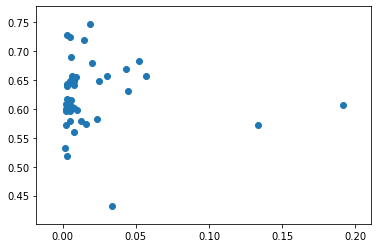

In [74]:
x_values = transit_turnout['2016 Transit Rate: Public Transit']
y_values = transit_turnout['2016 VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)